# Sentiment Analysis

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,author_name,content
aditya,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...
daniel,Daniel Rouquette,this is the daily news roundup delivered every...
deepti,Deepti Sri,singaporebased insurtech firm igloo has raised...
kul,Kul Bhushan,indiabased loco a streaming platform for video...
miguel,Miguel Cordon,singaporebased silent eight a startup offering...
roehl,Roehl Niño Bautista,amazon web services aws and the malaysian gove...
samreen,Samreen Ahmad,startups in india including loco and kuku fm r...
shravanth,Shravanth Vijayakumar,sign up for the daily newsletter sent exclusiv...
stefanie,Stefanie Yeo,as part of tech in asias international womens...
tia bot,TIA Bot,southeast asia has seen its fair share of mamp...


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each author

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)
data

,author_name,content,polarity,subjectivity
aditya,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...,0.062339,0.365868
daniel,Daniel Rouquette,this is the daily news roundup delivered every...,0.084074,0.401093
deepti,Deepti Sri,singaporebased insurtech firm igloo has raised...,0.062770,0.369840
kul,Kul Bhushan,indiabased loco a streaming platform for video...,0.055559,0.361121
miguel,Miguel Cordon,singaporebased silent eight a startup offering...,0.053775,0.369153
roehl,Roehl Niño Bautista,amazon web services aws and the malaysian gove...,0.042048,0.339654
samreen,Samreen Ahmad,startups in india including loco and kuku fm r...,0.059354,0.364765
shravanth,Shravanth Vijayakumar,sign up for the daily newsletter sent exclusiv...,0.071047,0.400009
stefanie,Stefanie Yeo,as part of tech in asias international womens...,0.118160,0.425773
tia bot,TIA Bot,southeast asia has seen its fair share of mamp...,0.175804,0.472870


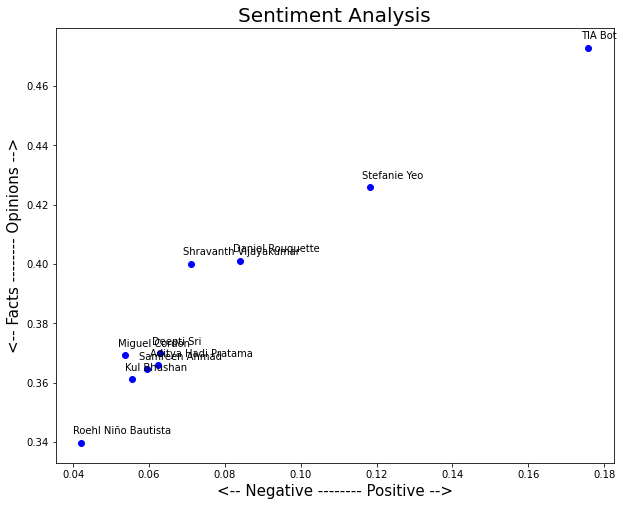

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, author in enumerate(data.index):
    x = data.polarity.loc[author]
    y = data.subjectivity.loc[author]
    plt.scatter(x, y, color='blue')
    plt.text(x-.002, y+.003, data['author_name'][index], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()